In [1]:
# For reproducibility
import numpy as np

# Set random seed for reproducibility
np.random.seed(493)

# Manipulating dataframes etc.
import pandas as pd

# To print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# MODELING

## Get the clean data

In [2]:
df = pd.read_csv('../data/fakeville_data_clean.csv')

## Create features and target variable

In [3]:
X = df.drop(columns='Rent')
y = df['Rent']

## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=493
)

## Baseline model

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

LinearRegression()

RMSE: 25116.135901041373
R²: 0.8654760378947595


Text(0.5, 0, 'Predicted Rent')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residuals vs Predicted')

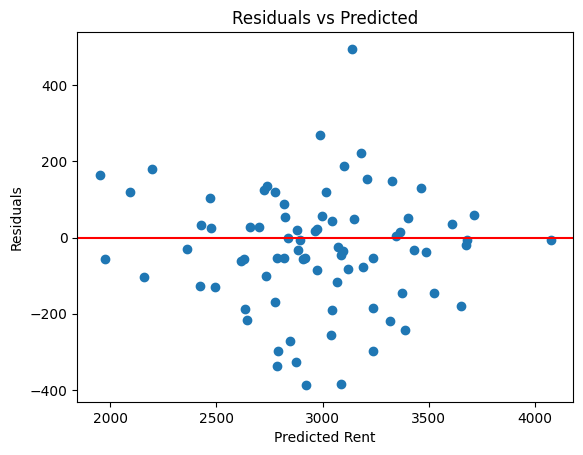

In [6]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Rent")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

In [8]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Refit your model using statsmodels for compatibility
X_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_sm).fit()
residuals = model_sm.resid

# Run Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_sm)

labels = ['Lagrange multiplier statistic', 'p-value', 
          'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': np.float64(4.008666312881671), 'p-value': np.float64(0.7787786773351837), 'f-value': np.float64(0.5652211174893006), 'f p-value': np.float64(0.7839996200718682)}
